## import necessary libraries

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

## implement helper functions

In [2]:
# TODO: Implement the distance function
def distance(city1, city2):
    """Calculate Euclidean distance between two cities."""
    dx = city1[0] - city2[0]
    dy = city1[1] - city2[1]
    return math.sqrt(dx**2 + dy**2)


# TODO: Implement the fitness function
def fitness(route):
    """Calculate the total distance of the route. Lower is better."""
    dist = 0

    for i in range(len(route) - 1):
        city1, city2 = cities[route[i]], cities[route[i + 1]]
        dist += distance(city1, city2)

    return dist


# TODO: Initialize the population
def initialize_population(size, num_cities):
    """Generate a population of random permutations of cities."""
    population = []
    for _ in range(size):
        population.append(random.sample(range(num_cities), num_cities))
    return population


# TODO: Implement selection
def select_parents(population, fitness_scores):
    """Select a parent solution based on fitness scores."""
    selected = random.choices(population, weights=fitness_scores, k=2)
    return selected[0], selected[1]


# TODO: Implement crossover
def crossover(parent1, parent2):
    """Generate two offspring using ordered crossover (OX)."""
    start, end = sorted(random.sample(range(len(parent1)), 2))
    offspring1 = [None] * len(parent1)
    offspring2 = [None] * len(parent2)

    offspring1[start:end] = parent1[start:end]
    offspring2[start:end] = parent2[start:end]

    def fill_offspring(offspring, parent):
        fill_positions = set(range(len(parent))) - set(range(start, end))
        fill_index = end
        for i in range(len(parent)):
            if parent[(end + i) % len(parent)] not in offspring:
                offspring[fill_index % len(parent)] = parent[(end + i) % len(parent)]
                fill_index += 1
        return offspring

    offspring1 = fill_offspring(offspring1, parent2)
    offspring2 = fill_offspring(offspring2, parent1)
    return offspring1, offspring2


# TODO: Implement mutation
def mutate(route, mutation_rate):
    """Introduce a random mutation in the route."""
    for i in range(len(route)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(route) - 1)
            route[i], route[j] = route[j], route[i]
    return route


# Visualization Function
def visualize_route(route, cities, generation):
    """Plot the current best route."""
    x = [cities[i][0] for i in route] + [cities[route[0]][0]]
    y = [cities[i][1] for i in route] + [cities[route[0]][1]]

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, "-o", label=f"Generation {generation}")
    plt.title(f"Route Visualization (Generation {generation})")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

## implement the GA and main loop

In [3]:
# TODO: Implement the Genetic Algorithm
def genetic_algorithm(cities, population_size=100, generations=300, mutation_rate=0.01):
    """Genetic Algorithm Main Loop"""

    num_cities = len(cities)
    population = initialize_population(population_size, num_cities)
    best_routes = []  # To track the best route per generation

    for generation in range(generations):
        best_route = []
        # TODO: Evaluate fitness for the current population
        fitness_scores = [1 / fitness(route) for route in population]
        # TODO: Track the best route of the current generation
        best_route = population[fitness_scores.index(max(fitness_scores))]
        best_routes.append(best_route)

        # Log the best fitness
        print(f"Generation {generation}: Best Fitness = {fitness(best_route)}")

        # TODO: Generate the next generation
        next_population = []
        for _ in range(population_size // 2):
            parent1, parent2 = select_parents(population, fitness_scores)
            offspring1, offspring2 = crossover(parent1, parent2)
            next_population.append(mutate(offspring1, mutation_rate))
            next_population.append(mutate(offspring2, mutation_rate))

        population = next_population
        
        # Visualize the best route every 25 generations
        if generation % 25 == 0 or generation == generations - 1:
            visualize_route(best_route, cities, generation)

    # TODO: Return the best route and its distance
    return best_route, fitness(best_route)

## Run and test with different cities

### test 1

Generation 0: Best Fitness = 51.35787387522949


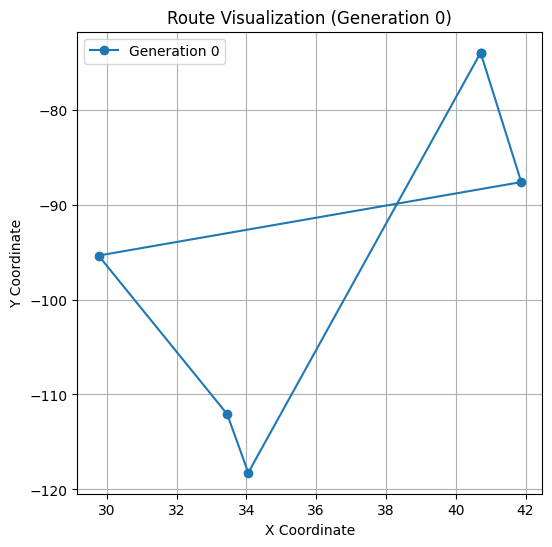

Generation 1: Best Fitness = 51.357873875229494
Generation 2: Best Fitness = 51.35787387522949
Generation 3: Best Fitness = 51.35787387522949
Generation 4: Best Fitness = 51.35787387522949
Generation 5: Best Fitness = 51.35787387522949
Generation 6: Best Fitness = 51.35787387522949
Generation 7: Best Fitness = 51.35787387522949
Generation 8: Best Fitness = 51.35787387522949
Generation 9: Best Fitness = 51.35787387522949
Generation 10: Best Fitness = 51.35787387522949
Generation 11: Best Fitness = 51.357873875229494
Generation 12: Best Fitness = 51.35787387522949
Generation 13: Best Fitness = 51.35787387522949
Generation 14: Best Fitness = 51.35787387522949
Generation 15: Best Fitness = 51.35787387522949
Generation 16: Best Fitness = 57.52444418442656
Generation 17: Best Fitness = 51.35787387522949
Generation 18: Best Fitness = 57.52444418442656
Generation 19: Best Fitness = 51.357873875229494
Generation 20: Best Fitness = 51.35787387522949
Generation 21: Best Fitness = 51.3578738752294

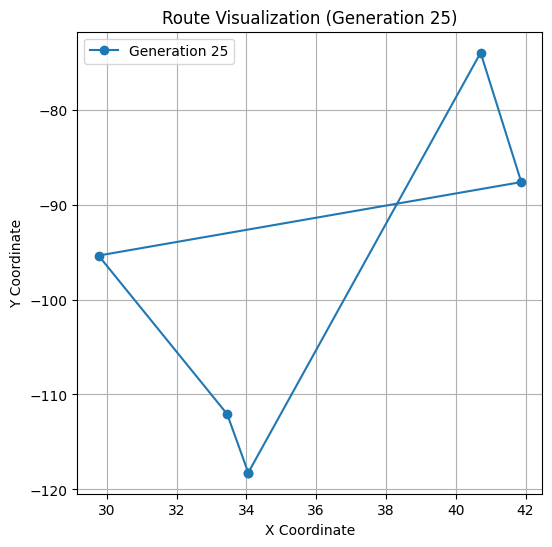

Generation 26: Best Fitness = 51.357873875229494
Generation 27: Best Fitness = 51.357873875229494
Generation 28: Best Fitness = 51.35787387522949
Generation 29: Best Fitness = 51.35787387522949
Generation 30: Best Fitness = 51.35787387522949
Generation 31: Best Fitness = 51.35787387522949
Generation 32: Best Fitness = 51.35787387522949
Generation 33: Best Fitness = 51.35787387522949
Generation 34: Best Fitness = 51.35787387522949
Generation 35: Best Fitness = 51.35787387522949
Generation 36: Best Fitness = 51.35787387522949
Generation 37: Best Fitness = 57.52444418442656
Generation 38: Best Fitness = 57.52444418442656
Generation 39: Best Fitness = 60.98684527036625
Generation 40: Best Fitness = 68.57754812236905
Generation 41: Best Fitness = 51.35787387522949
Generation 42: Best Fitness = 51.35787387522949
Generation 43: Best Fitness = 51.357873875229494
Generation 44: Best Fitness = 57.52444418442656
Generation 45: Best Fitness = 51.35787387522949
Generation 46: Best Fitness = 51.3578

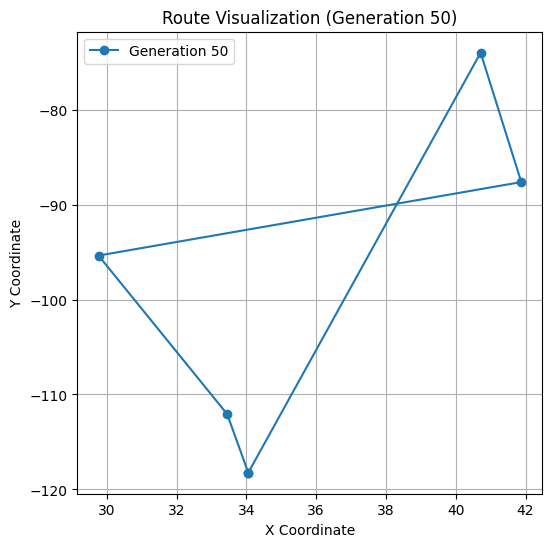

Generation 51: Best Fitness = 51.357873875229494
Generation 52: Best Fitness = 51.357873875229494
Generation 53: Best Fitness = 51.357873875229494
Generation 54: Best Fitness = 51.357873875229494
Generation 55: Best Fitness = 51.35787387522949
Generation 56: Best Fitness = 51.35787387522949
Generation 57: Best Fitness = 51.35787387522949
Generation 58: Best Fitness = 51.35787387522949
Generation 59: Best Fitness = 51.35787387522949
Generation 60: Best Fitness = 67.15341557956332
Generation 61: Best Fitness = 57.52444418442656
Generation 62: Best Fitness = 51.357873875229494
Generation 63: Best Fitness = 51.357873875229494
Generation 64: Best Fitness = 51.357873875229494
Generation 65: Best Fitness = 51.35787387522949
Generation 66: Best Fitness = 51.35787387522949
Generation 67: Best Fitness = 51.35787387522949
Generation 68: Best Fitness = 51.35787387522949
Generation 69: Best Fitness = 51.357873875229494
Generation 70: Best Fitness = 51.357873875229494
Generation 71: Best Fitness = 5

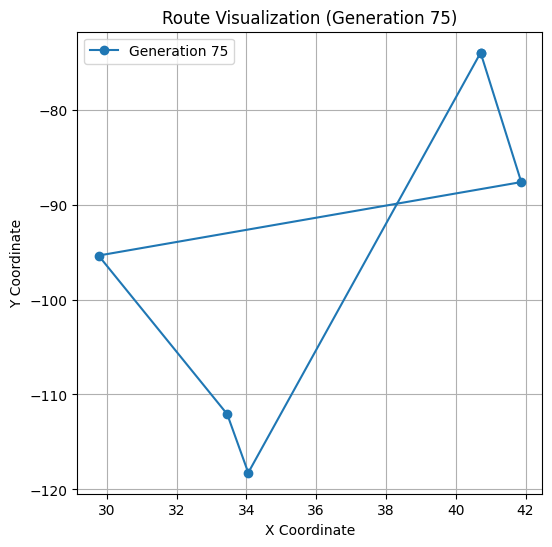

Generation 76: Best Fitness = 51.35787387522949
Generation 77: Best Fitness = 51.35787387522949
Generation 78: Best Fitness = 51.35787387522949
Generation 79: Best Fitness = 51.35787387522949
Generation 80: Best Fitness = 51.35787387522949
Generation 81: Best Fitness = 51.35787387522949
Generation 82: Best Fitness = 51.357873875229494
Generation 83: Best Fitness = 51.357873875229494
Generation 84: Best Fitness = 51.35787387522949
Generation 85: Best Fitness = 51.35787387522949
Generation 86: Best Fitness = 51.357873875229494
Generation 87: Best Fitness = 51.357873875229494
Generation 88: Best Fitness = 51.35787387522949
Generation 89: Best Fitness = 51.357873875229494
Generation 90: Best Fitness = 51.35787387522949
Generation 91: Best Fitness = 51.35787387522949
Generation 92: Best Fitness = 51.35787387522949
Generation 93: Best Fitness = 51.357873875229494
Generation 94: Best Fitness = 51.357873875229494
Generation 95: Best Fitness = 51.357873875229494
Generation 96: Best Fitness = 51

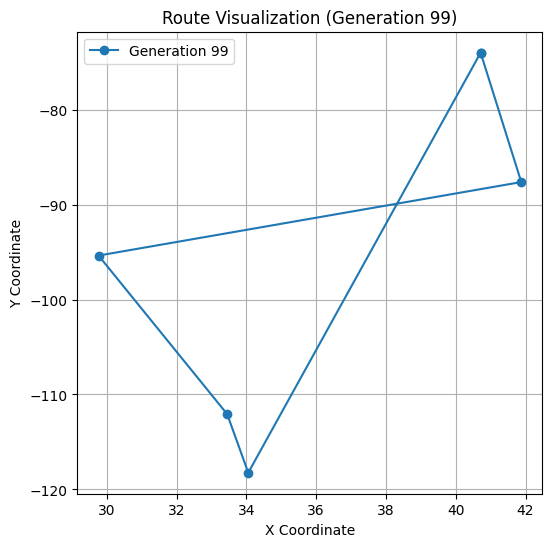

Best Route: [0, 2, 3, 4, 1]
Best Distance: 51.35787387522949


In [4]:
cities = [
    (40.7128, -74.0060),  # New York
    (34.0522, -118.2437),  # Los Angeles
    (41.8781, -87.6298),  # Chicago
    (29.7604, -95.3698),  # Houston
    (33.4484, -112.0740)  # Phoenix
]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=100)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

### test 2

Generation 0: Best Fitness = 47.796194364603366


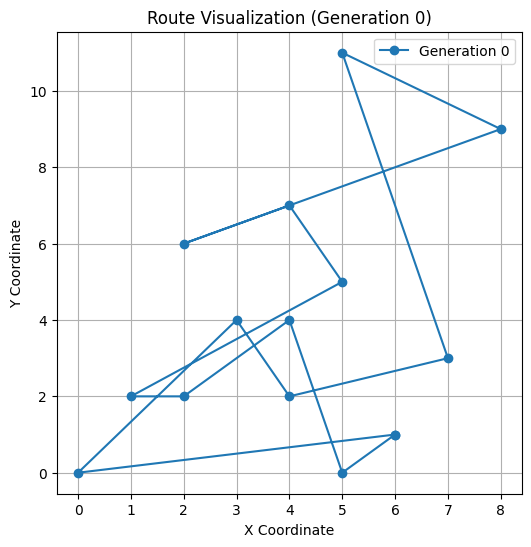

Generation 1: Best Fitness = 51.51299996624487
Generation 2: Best Fitness = 47.30903838197961
Generation 3: Best Fitness = 49.66582248342292
Generation 4: Best Fitness = 51.27295233836023
Generation 5: Best Fitness = 48.29342675599131
Generation 6: Best Fitness = 46.79675467743802
Generation 7: Best Fitness = 48.024956992106574
Generation 8: Best Fitness = 45.79955415123028
Generation 9: Best Fitness = 47.315982527850935
Generation 10: Best Fitness = 44.707345018154356
Generation 11: Best Fitness = 50.35693842728204
Generation 12: Best Fitness = 50.15613463298213
Generation 13: Best Fitness = 46.463436865606894
Generation 14: Best Fitness = 48.7065647925365
Generation 15: Best Fitness = 45.550348241994634
Generation 16: Best Fitness = 50.0118093513726
Generation 17: Best Fitness = 45.574002466586876
Generation 18: Best Fitness = 49.18183300342418
Generation 19: Best Fitness = 45.16757145687583
Generation 20: Best Fitness = 43.52453475677271
Generation 21: Best Fitness = 46.259022161833

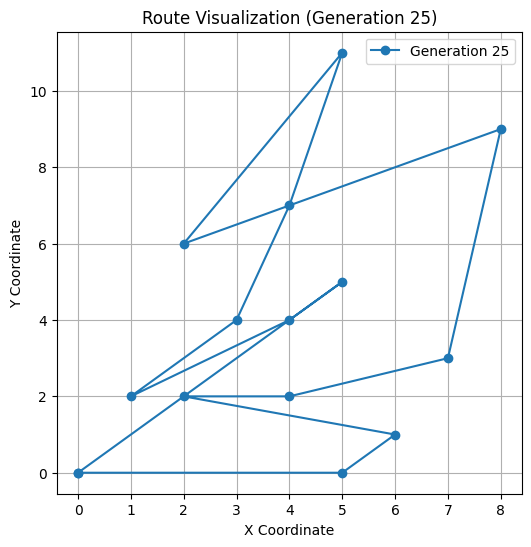

Generation 26: Best Fitness = 47.66679566940374
Generation 27: Best Fitness = 47.98887286759783
Generation 28: Best Fitness = 50.503876365585796
Generation 29: Best Fitness = 50.503876365585796
Generation 30: Best Fitness = 48.70310556884251
Generation 31: Best Fitness = 44.77542504867814
Generation 32: Best Fitness = 50.692118737098994
Generation 33: Best Fitness = 48.638178584624384
Generation 34: Best Fitness = 46.85307096321293
Generation 35: Best Fitness = 47.61073945687815
Generation 36: Best Fitness = 47.941756019268446
Generation 37: Best Fitness = 50.35628053593467
Generation 38: Best Fitness = 49.02572674678467
Generation 39: Best Fitness = 46.76451564799958
Generation 40: Best Fitness = 47.93501133391855
Generation 41: Best Fitness = 46.07065474656038
Generation 42: Best Fitness = 44.87044957294917
Generation 43: Best Fitness = 49.42320046459993
Generation 44: Best Fitness = 49.52736650875798
Generation 45: Best Fitness = 48.623072815564306
Generation 46: Best Fitness = 49.8

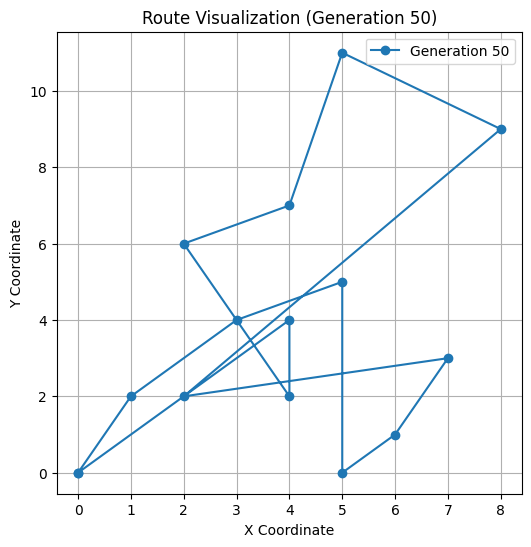

Generation 51: Best Fitness = 48.81914081117744
Generation 52: Best Fitness = 50.261722198688794
Generation 53: Best Fitness = 49.93501149548792
Generation 54: Best Fitness = 50.01549962762125
Generation 55: Best Fitness = 48.019409421306364
Generation 56: Best Fitness = 49.27815708442618
Generation 57: Best Fitness = 46.23878731450863
Generation 58: Best Fitness = 45.48196496656381
Generation 59: Best Fitness = 43.915854669599696
Generation 60: Best Fitness = 43.915854669599696
Generation 61: Best Fitness = 45.552382594567085
Generation 62: Best Fitness = 48.12707733516816
Generation 63: Best Fitness = 43.07566159569015
Generation 64: Best Fitness = 41.73504061528164
Generation 65: Best Fitness = 43.96201111306283
Generation 66: Best Fitness = 49.325275370850775
Generation 67: Best Fitness = 48.74208751386853
Generation 68: Best Fitness = 50.51104954123834
Generation 69: Best Fitness = 49.36550552604834
Generation 70: Best Fitness = 47.15131447358126
Generation 71: Best Fitness = 47.1

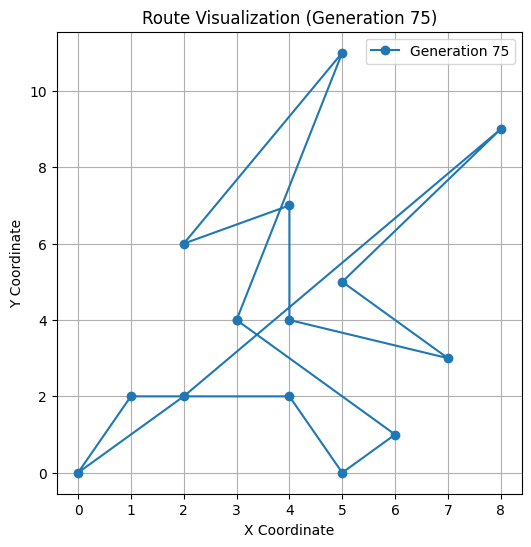

Generation 76: Best Fitness = 50.206724954513305
Generation 77: Best Fitness = 46.82798026988932
Generation 78: Best Fitness = 47.756531148816066
Generation 79: Best Fitness = 52.7877784419166
Generation 80: Best Fitness = 45.45131468933364
Generation 81: Best Fitness = 49.04313234978455
Generation 82: Best Fitness = 47.154322173703896
Generation 83: Best Fitness = 47.154322173703896
Generation 84: Best Fitness = 45.26728452558602
Generation 85: Best Fitness = 46.08913894071271
Generation 86: Best Fitness = 47.40967205901724
Generation 87: Best Fitness = 44.128461979503385
Generation 88: Best Fitness = 49.13181340543374
Generation 89: Best Fitness = 49.110815422107066
Generation 90: Best Fitness = 47.53412648634705
Generation 91: Best Fitness = 48.245574946199426
Generation 92: Best Fitness = 46.2266794380735
Generation 93: Best Fitness = 47.99227938535162
Generation 94: Best Fitness = 49.61537422637863
Generation 95: Best Fitness = 46.42164323215937
Generation 96: Best Fitness = 35.42

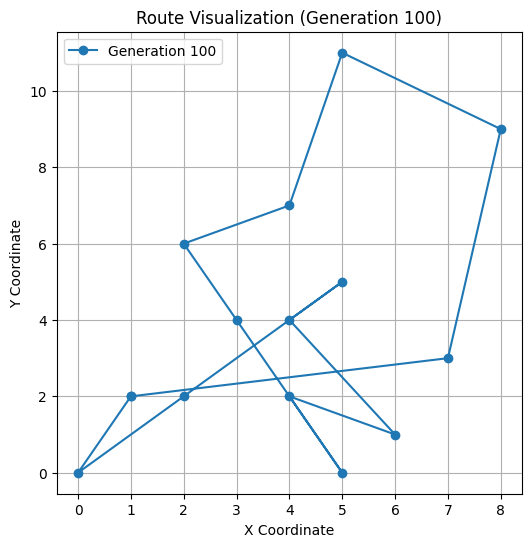

Generation 101: Best Fitness = 44.82576367573131
Generation 102: Best Fitness = 45.801222932202336
Generation 103: Best Fitness = 47.965409701448465
Generation 104: Best Fitness = 50.00506466602272
Generation 105: Best Fitness = 50.310683940742365
Generation 106: Best Fitness = 49.63359370231637
Generation 107: Best Fitness = 51.494813869450454
Generation 108: Best Fitness = 47.751172331824414
Generation 109: Best Fitness = 49.96922350905591
Generation 110: Best Fitness = 49.13566902478541
Generation 111: Best Fitness = 46.57180404550388
Generation 112: Best Fitness = 44.08373171509449
Generation 113: Best Fitness = 50.4161905943033
Generation 114: Best Fitness = 48.1801226168035
Generation 115: Best Fitness = 50.923379301802235
Generation 116: Best Fitness = 47.72060993741714
Generation 117: Best Fitness = 48.94184313940256
Generation 118: Best Fitness = 52.22916001020684
Generation 119: Best Fitness = 47.250594441288506
Generation 120: Best Fitness = 45.8939415112311
Generation 121: 

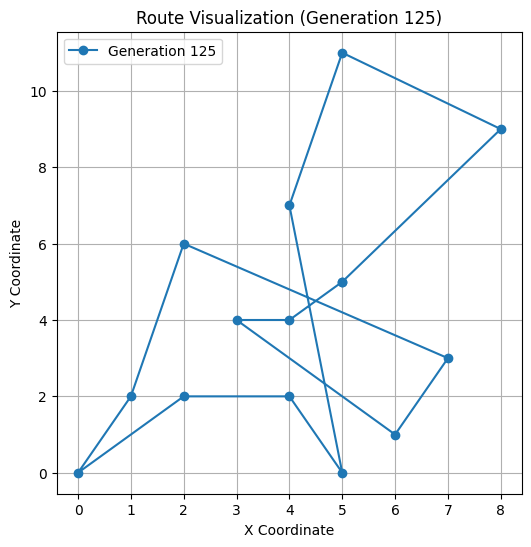

Generation 126: Best Fitness = 45.815132863368355
Generation 127: Best Fitness = 45.24600939741115
Generation 128: Best Fitness = 45.24600939741115
Generation 129: Best Fitness = 52.093886308662235
Generation 130: Best Fitness = 50.12061748317092
Generation 131: Best Fitness = 49.54661478477304
Generation 132: Best Fitness = 50.96704757297341
Generation 133: Best Fitness = 42.8685531670516
Generation 134: Best Fitness = 44.65613564941497
Generation 135: Best Fitness = 44.65613564941497
Generation 136: Best Fitness = 49.386344156763194
Generation 137: Best Fitness = 49.82002591346773
Generation 138: Best Fitness = 42.43734711050205
Generation 139: Best Fitness = 46.281642159953165
Generation 140: Best Fitness = 47.91992373690914
Generation 141: Best Fitness = 53.272292594023206
Generation 142: Best Fitness = 46.51912892844244
Generation 143: Best Fitness = 49.273035075612924
Generation 144: Best Fitness = 43.74789353607844
Generation 145: Best Fitness = 42.886178955655836
Generation 146

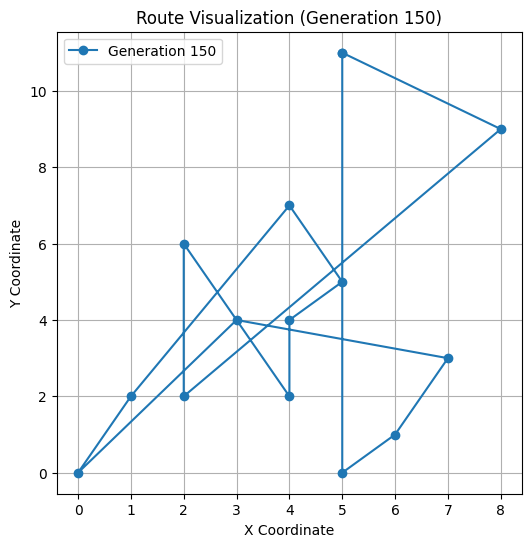

Generation 151: Best Fitness = 39.19990698996921
Generation 152: Best Fitness = 52.27999372378009
Generation 153: Best Fitness = 48.216960642172566
Generation 154: Best Fitness = 48.19606071532798
Generation 155: Best Fitness = 45.42889979249736
Generation 156: Best Fitness = 48.56982984670172
Generation 157: Best Fitness = 48.93494467519515
Generation 158: Best Fitness = 46.94673057410332
Generation 159: Best Fitness = 49.46802190948424
Generation 160: Best Fitness = 51.912570699594134
Generation 161: Best Fitness = 49.83392993042273
Generation 162: Best Fitness = 50.99377843829764
Generation 163: Best Fitness = 48.27270872659681
Generation 164: Best Fitness = 48.65414064554312
Generation 165: Best Fitness = 49.39884477299387
Generation 166: Best Fitness = 48.05568613275918
Generation 167: Best Fitness = 49.168363442138116
Generation 168: Best Fitness = 44.535351922450545
Generation 169: Best Fitness = 47.215649809491694
Generation 170: Best Fitness = 45.14522469398529
Generation 171:

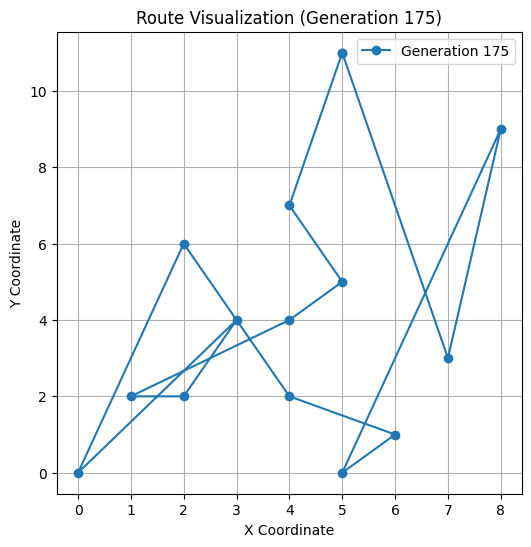

Generation 176: Best Fitness = 44.787947257261685
Generation 177: Best Fitness = 48.836540645250956
Generation 178: Best Fitness = 46.56168969179009
Generation 179: Best Fitness = 47.254164843835184
Generation 180: Best Fitness = 46.3168761037552
Generation 181: Best Fitness = 44.65920845787465
Generation 182: Best Fitness = 42.63618592882356
Generation 183: Best Fitness = 49.21531915830059
Generation 184: Best Fitness = 49.549548662156326
Generation 185: Best Fitness = 48.94790438998059
Generation 186: Best Fitness = 48.13413536904504
Generation 187: Best Fitness = 48.87155947453074
Generation 188: Best Fitness = 48.87155947453074
Generation 189: Best Fitness = 50.285773036903834
Generation 190: Best Fitness = 49.9127616615129
Generation 191: Best Fitness = 46.965370699955045
Generation 192: Best Fitness = 48.53288970952971
Generation 193: Best Fitness = 48.53288970952971
Generation 194: Best Fitness = 48.53288970952971
Generation 195: Best Fitness = 48.6179620265006
Generation 196: B

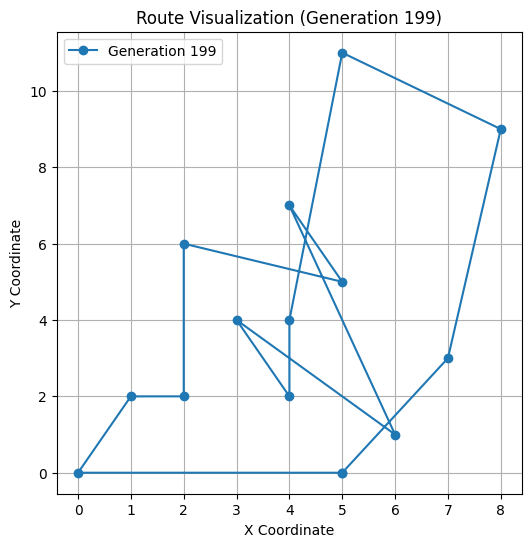

Best Route: [12, 7, 10, 13, 8, 11, 2, 3, 6, 4, 5, 9, 1, 0]
Best Distance: 47.80261049321547


In [5]:
cities = [
    (0, 0), (1, 2), (3, 4), (6, 1), (5, 5), (2, 6), (4, 7), (7, 3), (4, 4), (2, 2), (8, 9), (4, 2), (5, 0), (5, 11),
]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=200)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

### test 3

Generation 0: Best Fitness = 959.6398538729329


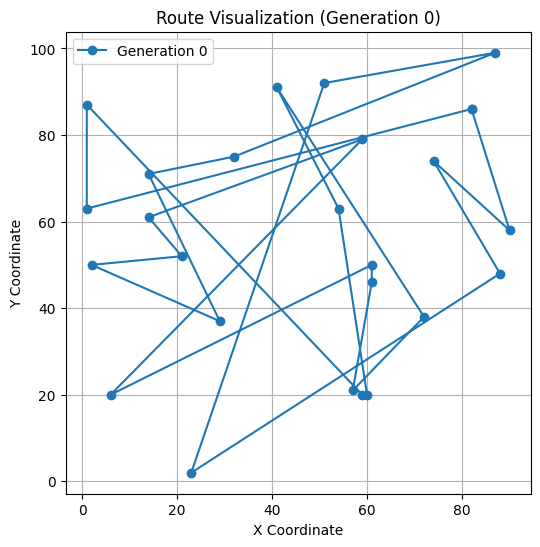

Generation 1: Best Fitness = 1005.5294777280919
Generation 2: Best Fitness = 960.0456639142596
Generation 3: Best Fitness = 1003.4013959334139
Generation 4: Best Fitness = 1019.9381296639624
Generation 5: Best Fitness = 994.7189114026785
Generation 6: Best Fitness = 981.6182486081249
Generation 7: Best Fitness = 945.3255036504415
Generation 8: Best Fitness = 964.2455106539053
Generation 9: Best Fitness = 941.5158038355943
Generation 10: Best Fitness = 898.5214834733646
Generation 11: Best Fitness = 908.1550780140116
Generation 12: Best Fitness = 876.1585173036573
Generation 13: Best Fitness = 924.8900248091526
Generation 14: Best Fitness = 966.5729063072379
Generation 15: Best Fitness = 1000.674197656897
Generation 16: Best Fitness = 992.704340506945
Generation 17: Best Fitness = 921.9967247759132
Generation 18: Best Fitness = 984.3832698224257
Generation 19: Best Fitness = 947.0756128560597
Generation 20: Best Fitness = 898.2654522070533
Generation 21: Best Fitness = 905.9416237404757

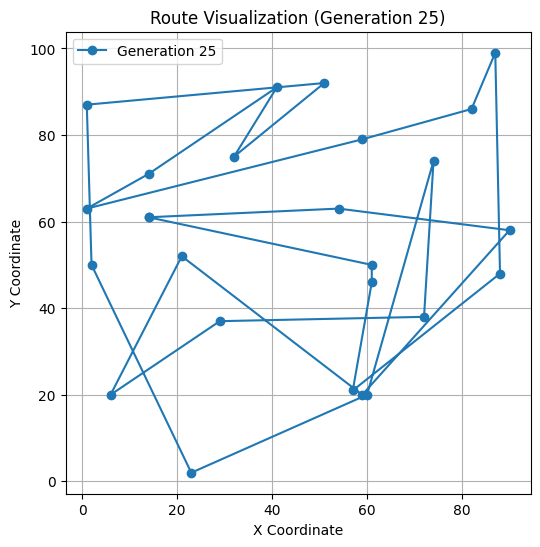

Generation 26: Best Fitness = 876.7344036928575
Generation 27: Best Fitness = 844.9396396550035
Generation 28: Best Fitness = 902.419305365375
Generation 29: Best Fitness = 909.5502655631062
Generation 30: Best Fitness = 966.3332947901603
Generation 31: Best Fitness = 956.0393889844013
Generation 32: Best Fitness = 1009.0605957168337
Generation 33: Best Fitness = 973.3156948177506
Generation 34: Best Fitness = 972.4138124572331
Generation 35: Best Fitness = 983.9456621267527
Generation 36: Best Fitness = 905.6746136818967
Generation 37: Best Fitness = 952.2147132848197
Generation 38: Best Fitness = 992.7515538232054
Generation 39: Best Fitness = 963.3487020611702
Generation 40: Best Fitness = 943.849579209252
Generation 41: Best Fitness = 978.4644073327103
Generation 42: Best Fitness = 961.2179470456914
Generation 43: Best Fitness = 970.0873956861084
Generation 44: Best Fitness = 953.0894135087284
Generation 45: Best Fitness = 1011.3199256551612
Generation 46: Best Fitness = 1005.12178

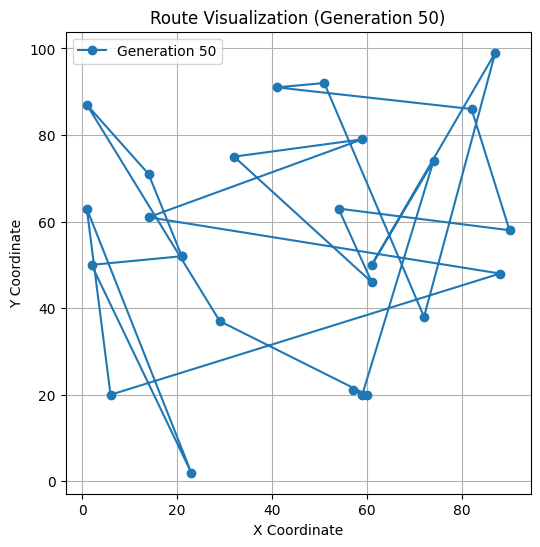

Generation 51: Best Fitness = 888.9624607086607
Generation 52: Best Fitness = 902.5324733838856
Generation 53: Best Fitness = 866.6773586162046
Generation 54: Best Fitness = 878.4206427152394
Generation 55: Best Fitness = 928.6350586996749
Generation 56: Best Fitness = 935.6623248595597
Generation 57: Best Fitness = 958.6705738034038
Generation 58: Best Fitness = 948.3167810160804
Generation 59: Best Fitness = 899.5134648691117
Generation 60: Best Fitness = 892.709361846838
Generation 61: Best Fitness = 935.9508367179743
Generation 62: Best Fitness = 828.4669075266281
Generation 63: Best Fitness = 946.7725101569819
Generation 64: Best Fitness = 922.9304273560386
Generation 65: Best Fitness = 951.3454265239626
Generation 66: Best Fitness = 951.9991756952138
Generation 67: Best Fitness = 956.4201165788003
Generation 68: Best Fitness = 972.4874634095299
Generation 69: Best Fitness = 971.524127004766
Generation 70: Best Fitness = 975.008576080326
Generation 71: Best Fitness = 929.791440383

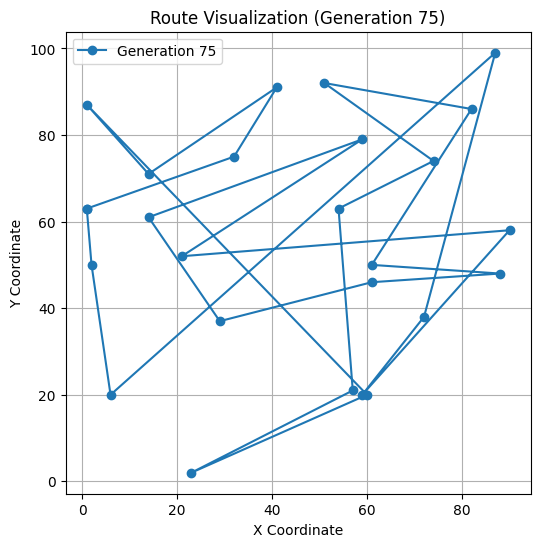

Generation 76: Best Fitness = 913.0963836769348
Generation 77: Best Fitness = 948.5423903250067
Generation 78: Best Fitness = 898.5037011701602
Generation 79: Best Fitness = 987.8798807506502
Generation 80: Best Fitness = 935.3161465031235
Generation 81: Best Fitness = 906.8252731735423
Generation 82: Best Fitness = 932.9554115200015
Generation 83: Best Fitness = 930.2943712473913
Generation 84: Best Fitness = 939.8353098597356
Generation 85: Best Fitness = 908.2290475053329
Generation 86: Best Fitness = 980.7557522453626
Generation 87: Best Fitness = 954.4626734844772
Generation 88: Best Fitness = 930.8706314167596
Generation 89: Best Fitness = 879.7212239867149
Generation 90: Best Fitness = 886.7394066335359
Generation 91: Best Fitness = 975.0471570656309
Generation 92: Best Fitness = 982.0756975300662
Generation 93: Best Fitness = 966.5013664102929
Generation 94: Best Fitness = 982.7323769036624
Generation 95: Best Fitness = 985.2842151606492
Generation 96: Best Fitness = 959.431249

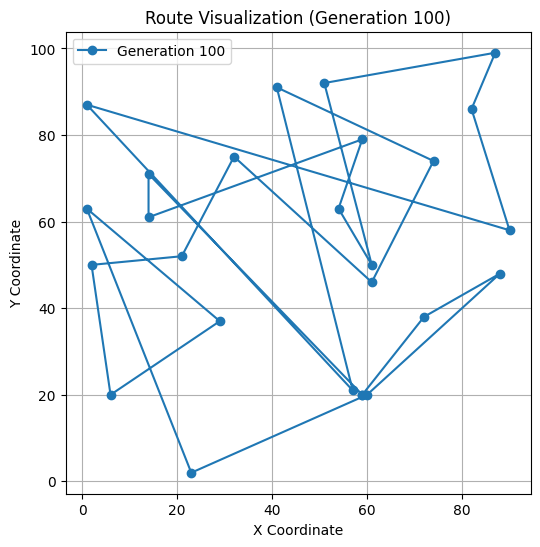

Generation 101: Best Fitness = 978.7088462379345
Generation 102: Best Fitness = 1000.1087454885193
Generation 103: Best Fitness = 964.2262700722506
Generation 104: Best Fitness = 980.1409970005852
Generation 105: Best Fitness = 938.0184941238995
Generation 106: Best Fitness = 958.5114621316602
Generation 107: Best Fitness = 971.7642831382732
Generation 108: Best Fitness = 936.8122480146078
Generation 109: Best Fitness = 960.8257177899374
Generation 110: Best Fitness = 963.830907518896
Generation 111: Best Fitness = 773.5248496536329
Generation 112: Best Fitness = 967.676906688964
Generation 113: Best Fitness = 962.1816977719176
Generation 114: Best Fitness = 965.9009470272038
Generation 115: Best Fitness = 934.8879353988362
Generation 116: Best Fitness = 951.1908121327987
Generation 117: Best Fitness = 933.5469579503134
Generation 118: Best Fitness = 990.9458478442523
Generation 119: Best Fitness = 973.9869164985695
Generation 120: Best Fitness = 947.8568824187333
Generation 121: Best 

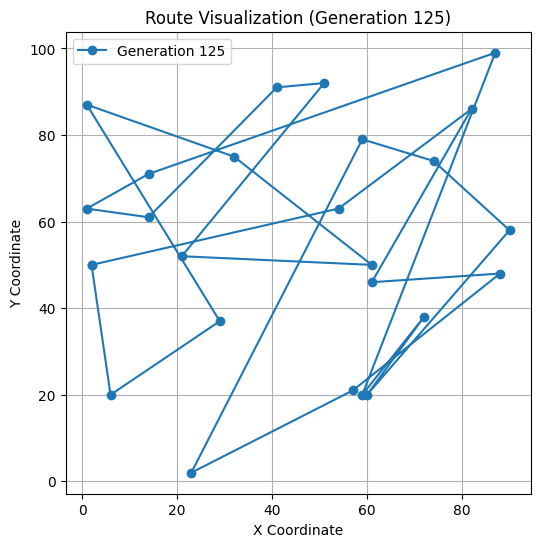

Generation 126: Best Fitness = 1004.691953359411
Generation 127: Best Fitness = 931.7345411860223
Generation 128: Best Fitness = 927.8572825960978
Generation 129: Best Fitness = 937.6104218746464
Generation 130: Best Fitness = 968.9217193149689
Generation 131: Best Fitness = 927.9141864154426
Generation 132: Best Fitness = 903.0945063246692
Generation 133: Best Fitness = 942.069294456369
Generation 134: Best Fitness = 947.4528354062783
Generation 135: Best Fitness = 961.6448312012202
Generation 136: Best Fitness = 929.7609350099536
Generation 137: Best Fitness = 958.8961742379748
Generation 138: Best Fitness = 958.8961742379748
Generation 139: Best Fitness = 980.5662373283889
Generation 140: Best Fitness = 987.6985131038541
Generation 141: Best Fitness = 964.804205827972
Generation 142: Best Fitness = 969.9340657820817
Generation 143: Best Fitness = 982.1986929628855
Generation 144: Best Fitness = 982.1197840401816
Generation 145: Best Fitness = 968.2743305556846
Generation 146: Best F

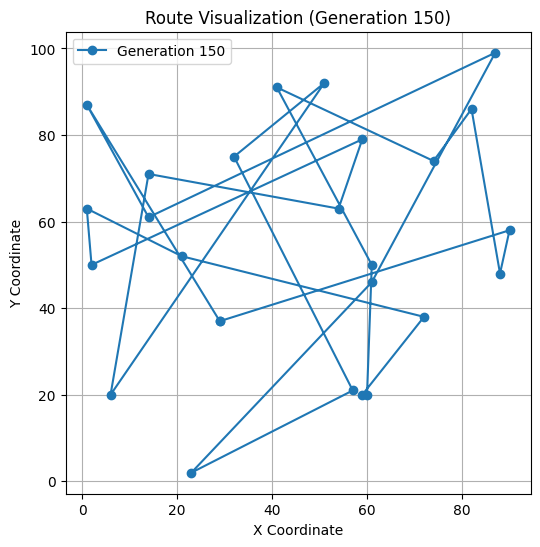

Generation 151: Best Fitness = 980.1604136448974
Generation 152: Best Fitness = 964.83699370805
Generation 153: Best Fitness = 997.6254827968598
Generation 154: Best Fitness = 938.6727718404649
Generation 155: Best Fitness = 980.2871308871069
Generation 156: Best Fitness = 976.6727911345267
Generation 157: Best Fitness = 932.1483808187094
Generation 158: Best Fitness = 888.4500000695526
Generation 159: Best Fitness = 931.2099776274258
Generation 160: Best Fitness = 897.7331086256133
Generation 161: Best Fitness = 995.6893918731092
Generation 162: Best Fitness = 948.0694122001753
Generation 163: Best Fitness = 968.9563811973925
Generation 164: Best Fitness = 913.5818462565527
Generation 165: Best Fitness = 997.3925034871581
Generation 166: Best Fitness = 972.8425819609055
Generation 167: Best Fitness = 942.549938940085
Generation 168: Best Fitness = 956.7341194903214
Generation 169: Best Fitness = 932.0077995685316
Generation 170: Best Fitness = 930.7049013137605
Generation 171: Best Fi

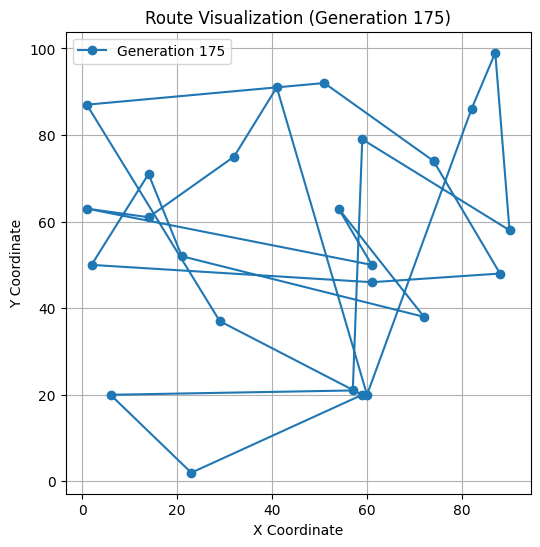

Generation 176: Best Fitness = 982.8248198088554
Generation 177: Best Fitness = 870.1879437247179
Generation 178: Best Fitness = 992.7950781661601
Generation 179: Best Fitness = 1017.211255761122
Generation 180: Best Fitness = 963.8578793774435
Generation 181: Best Fitness = 888.614050641319
Generation 182: Best Fitness = 965.4050676959455
Generation 183: Best Fitness = 922.450104514039
Generation 184: Best Fitness = 969.4289773444393
Generation 185: Best Fitness = 889.335242196826
Generation 186: Best Fitness = 952.1902554065604
Generation 187: Best Fitness = 949.9789042519428
Generation 188: Best Fitness = 946.5496491862084
Generation 189: Best Fitness = 982.5784371556291
Generation 190: Best Fitness = 957.1983694211132
Generation 191: Best Fitness = 997.9438562660989
Generation 192: Best Fitness = 940.1387372805972
Generation 193: Best Fitness = 979.3989542422961
Generation 194: Best Fitness = 871.7788578332926
Generation 195: Best Fitness = 895.0274610020285
Generation 196: Best Fi

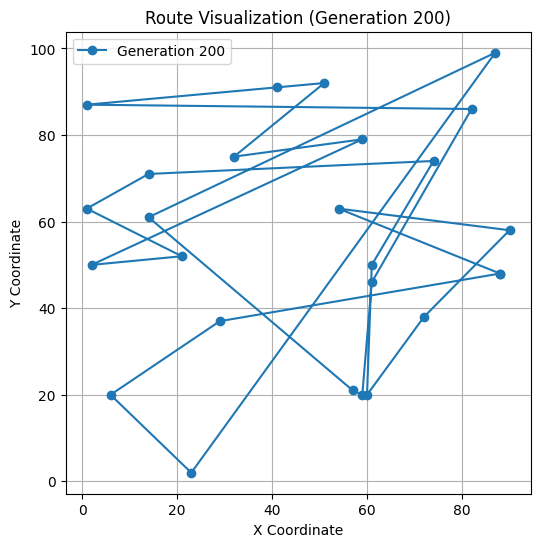

Generation 201: Best Fitness = 904.0725685773093
Generation 202: Best Fitness = 941.1638313474413
Generation 203: Best Fitness = 925.9912365547084
Generation 204: Best Fitness = 954.2323997484285
Generation 205: Best Fitness = 823.9895531635249
Generation 206: Best Fitness = 882.67828781549
Generation 207: Best Fitness = 902.4896867051879
Generation 208: Best Fitness = 932.6306555445597
Generation 209: Best Fitness = 878.2772658516617
Generation 210: Best Fitness = 864.8129958622276
Generation 211: Best Fitness = 956.4238616451979
Generation 212: Best Fitness = 948.0698543255744
Generation 213: Best Fitness = 1019.2462336398239
Generation 214: Best Fitness = 957.1174869942516
Generation 215: Best Fitness = 938.644412931267
Generation 216: Best Fitness = 939.6442404510288
Generation 217: Best Fitness = 975.6889277660139
Generation 218: Best Fitness = 958.522764481281
Generation 219: Best Fitness = 988.783383740102
Generation 220: Best Fitness = 917.5832788860737
Generation 221: Best Fit

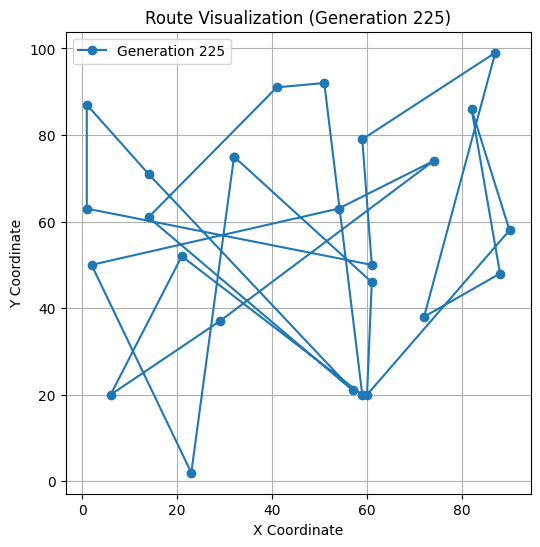

Generation 226: Best Fitness = 966.9607159931098
Generation 227: Best Fitness = 869.0638420277226
Generation 228: Best Fitness = 886.8446430173565
Generation 229: Best Fitness = 1013.4350788682233
Generation 230: Best Fitness = 967.9608566686942
Generation 231: Best Fitness = 941.5501740006301
Generation 232: Best Fitness = 984.3469913908755
Generation 233: Best Fitness = 922.4487429533049
Generation 234: Best Fitness = 922.4487429533049
Generation 235: Best Fitness = 1011.1995744310913
Generation 236: Best Fitness = 993.0831768598259
Generation 237: Best Fitness = 964.5826824366486
Generation 238: Best Fitness = 928.197093766683
Generation 239: Best Fitness = 972.4564412354995
Generation 240: Best Fitness = 997.763472512423
Generation 241: Best Fitness = 991.1001763234765
Generation 242: Best Fitness = 865.7751192119473
Generation 243: Best Fitness = 865.7751192119473
Generation 244: Best Fitness = 902.6572075375828
Generation 245: Best Fitness = 956.5782334647329
Generation 246: Best

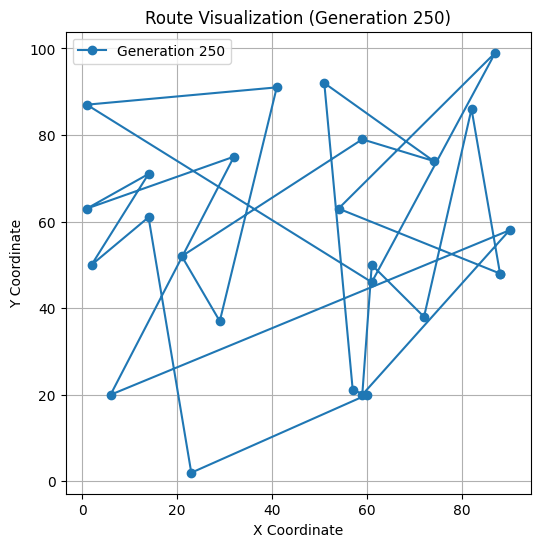

Generation 251: Best Fitness = 912.1564651461064
Generation 252: Best Fitness = 948.1444279801773
Generation 253: Best Fitness = 1017.0762405609815
Generation 254: Best Fitness = 1002.1081394558944
Generation 255: Best Fitness = 925.4233229838047
Generation 256: Best Fitness = 938.5852221996845
Generation 257: Best Fitness = 898.8079470327002
Generation 258: Best Fitness = 913.724279437253
Generation 259: Best Fitness = 979.4595355649175
Generation 260: Best Fitness = 915.3412288762653
Generation 261: Best Fitness = 947.9845657270585
Generation 262: Best Fitness = 1029.3462008875742
Generation 263: Best Fitness = 961.8419524179048
Generation 264: Best Fitness = 929.7675514350982
Generation 265: Best Fitness = 992.9895117547711
Generation 266: Best Fitness = 898.8385710766545
Generation 267: Best Fitness = 920.6814629669215
Generation 268: Best Fitness = 985.9679679169358
Generation 269: Best Fitness = 929.873784414897
Generation 270: Best Fitness = 928.2865325450858
Generation 271: Bes

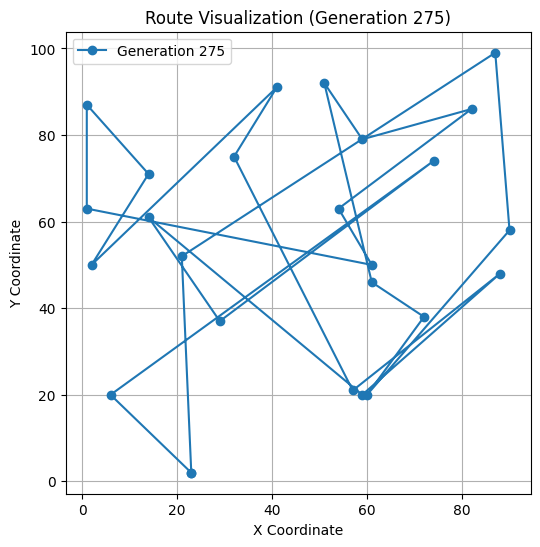

Generation 276: Best Fitness = 979.2820439920172
Generation 277: Best Fitness = 983.6707175324939
Generation 278: Best Fitness = 952.1117344418108
Generation 279: Best Fitness = 972.192337014927
Generation 280: Best Fitness = 987.1373215961263
Generation 281: Best Fitness = 954.0762780779547
Generation 282: Best Fitness = 937.4214115640492
Generation 283: Best Fitness = 944.9364149670836
Generation 284: Best Fitness = 889.0895009604005
Generation 285: Best Fitness = 889.0895009604005
Generation 286: Best Fitness = 970.0190757083753
Generation 287: Best Fitness = 976.6287737031361
Generation 288: Best Fitness = 969.7634784444678
Generation 289: Best Fitness = 920.8525249421616
Generation 290: Best Fitness = 960.9004579592294
Generation 291: Best Fitness = 932.7451457724147
Generation 292: Best Fitness = 962.5179201892784
Generation 293: Best Fitness = 905.7258438741223
Generation 294: Best Fitness = 1041.4479392430394
Generation 295: Best Fitness = 904.1133624206018
Generation 296: Best

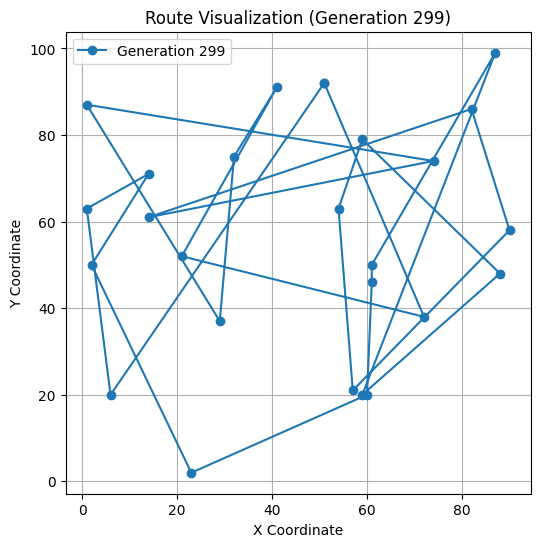

Best Route: [0, 24, 7, 16, 12, 9, 8, 4, 18, 3, 15, 13, 21, 17, 14, 11, 5, 20, 19, 2, 6, 22, 1, 10, 23]
Best Distance: 1042.3430173134427


In [6]:
np.random.seed(42)  # For reproducibility
cities = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(25)]

# Run the Genetic Algorithm
best_route, best_distance = genetic_algorithm(cities, generations=300)
print("Best Route:", best_route)
print("Best Distance:", best_distance)

## Analysis

Test with various mutation rates, population sizes, and generations to analyze the impact on results. Then analyze and express the effect of each parameter.

*answer*

طبق بررسی انجام شده، با افزایش سایز جمعیت از ۱۰۰ به ۱۰۰۰
 سبب بهبود نتایج حاصله شده و ژن‌های خوب بیشتر به نسل‌های بعدی انتقال می‌یابند. از طرفی
 افزایش جهش سبب بهبود نتایج نمی‌شود. همچنین افزایش تعداد نسل‌ها تا
 یک محدوده‌ای مفید بوده و از آنجا به بعد سبب بهبود نتایج نمی‌شود. 